# 📚 Introduction to Linear Regression

Linear Regression is a supervised learning algorithm used to predict continuous outcomes. It establishes a relationship between input \(x\) and output \(y\) using a linear equation:

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

- $h_\theta(x)$: **Predicted value**
- $\theta_0$: **Intercept (bias term)**
- $\theta_1$: **Slope (weight of the feature)**

The goal is to find the optimal values for $\theta_0$ and $\theta_1$ such that the line fits the data as closely as possible.



### 📊 Complex Synthetic Dataset

We'll create a synthetic dataset with the following characteristics:

1. **Non-uniform Distribution:** Data points are denser in certain regions.
2. **Noise:** Random noise added to simulate measurement errors.
3. **Outliers:** A few extreme data points are added.
4. **Slight Non-Linearity:** Data points won't perfectly follow a straight line.



In [1]:
import sys
sys.path.append(r'c:\Users\emanu\Downloads\DataScienceFromScratch')
from RegressionFunction import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm


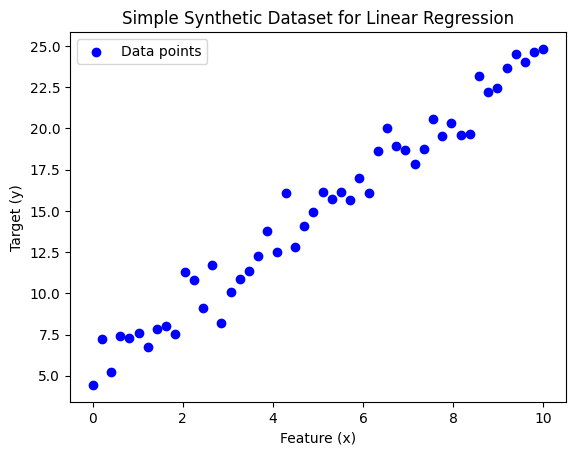

In [106]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np


x, y = generate_simple_data()

plt.scatter(x, y, color='blue', label="Data points")
plt.title("Simple Synthetic Dataset for Linear Regression")
plt.xlabel("Feature (x)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()



### 🧠 Hypothesis Function

The **hypothesis function** predicts the target variable using the linear equation:

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

- $h_\theta(x)$: Predicted output
- $\theta_0$: Intercept
- $\theta_1$: Slope

The function estimates the value of $y$ based on input $x$ and model parameters.


### 📉 Cost Function

The **Cost Function** measures how well the predicted values match the actual values.

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

Where:
- $m$: Number of samples
- $h_\theta(x^{(i)})$: Predicted value for sample $i$
- $y^{(i)}$: Actual value for sample $i$

The cost function calculates the **Mean Squared Error (MSE)** between predicted and actual values.


### 🚀 1. Gradient Descent

Gradient Descent minimizes the cost function iteratively by adjusting the model parameters.

#### Update Rules:
$$
\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)
$$

$$
\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)}
$$

Where:
- $\alpha$: Learning rate (step size)
- $m$: Number of samples

##### Gradient Interpretation:
- The partial derivative w.r.t $\theta_0$ adjusts the intercept.
- The partial derivative w.r.t $\theta_1$ adjusts the slope.

The algorithm stops when the cost function converges or reaches a predefined number of iterations.


### 🛠️ Training the Model

##### Training Steps:
1. Initialize parameters: $\theta_0 = 0$, $\theta_1 = 0$
2. Set hyperparameters:
   - Learning Rate ($\alpha$)
   - Number of Iterations
3. Perform Gradient Descent:
   - Update $\theta_0$ and $\theta_1$ using gradient descent.
4. Track cost history to monitor convergence.
5. Stop when the cost function stabilizes or reaches the maximum iterations.

At the end of training, we obtain optimized values for $\theta_0$ and $\theta_1$.


In [107]:
theta_0 = 0  # Initial intercept
theta_1 = 0  # Initial slope
learning_rate = 0.01
iterations = 2000

# Train using gradient descent
theta_0, theta_1, cost_history = gradient_descent(x, y, theta_0, theta_1, learning_rate, iterations)

final_cost = cost_history[-1]
print(f"Final Cost: {final_cost:.4f}")

print(f"Final Theta_0: {theta_0:.4f}, Final Theta_1: {theta_1:.4f}")


Final Cost: 0.5512
Final Theta_0: 5.2031, Final Theta_1: 1.9491


##### Cost Function Visualization

The cost function can be visualized over iterations to ensure convergence.

A decreasing cost plot indicates that the model is learning effectively.


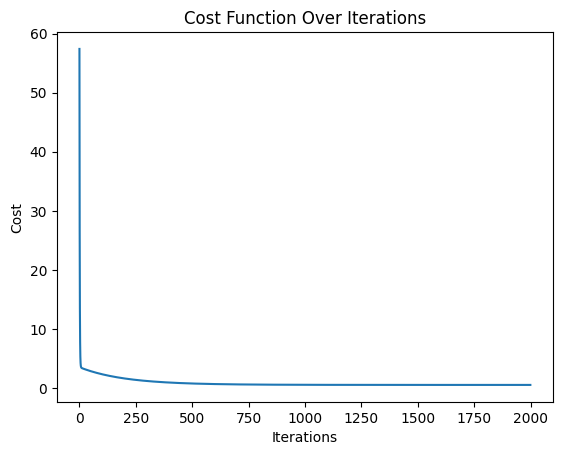

In [108]:
# Plot
plt.plot(range(iterations), cost_history)
plt.title("Cost Function Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()


### 📉 **Cost Function Over Iterations for Different Learning Rates**

##### 🧠 **Key Observations:**
1. **Learning Rate (0.01):** Fast and stable convergence.
2. **Learning Rate (0.001):** Slow but steady convergence.
3. **Learning Rate (0.0001):** Very slow convergence, inefficient.

##### ✅ **Best Practice:**
- Experiment with different learning rates to find the optimal balance.
- Use plots like this to diagnose gradient descent performance.


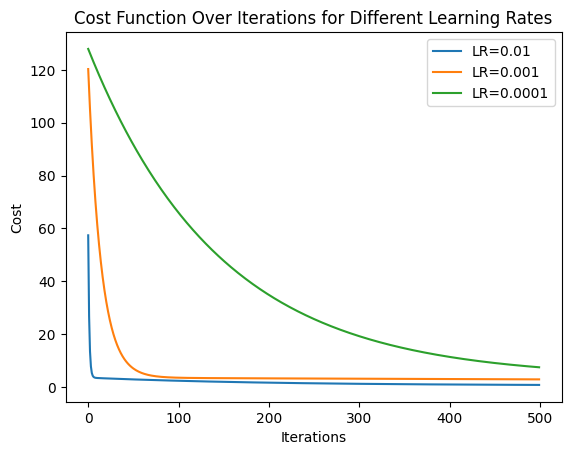

In [109]:
learning_rates = [0.01, 0.001, 0.0001]
for lr in learning_rates:
    theta_0_l, theta_1_l, cost_history = gradient_descent(x, y, 0, 0, lr, 500)
    plt.plot(range(500), cost_history, label=f'LR={lr}')

plt.title("Cost Function Over Iterations for Different Learning Rates")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()


### 📈 3D Cost Function Visualization

1. The cost function surface forms a **bowl-shaped curve**.
2. The **optimal point (red dot)** is located at the **lowest point** on the surface.
3. Adjusting $\theta_0$ and $\theta_1$ influences the cost, and the gradient descent algorithm guides the parameters toward this minimum.


In [110]:
import plotly.graph_objects as go

# Adjust the range for 𝜃_0 and 𝜃_1 dynamically based on the final optimized values
theta_0_range = np.linspace(theta_0 - 5, theta_0 + 5, 100)
theta_1_range = np.linspace(theta_1 - 5, theta_1 + 5, 100)
theta_0_grid, theta_1_grid = np.meshgrid(theta_0_range, theta_1_range)
cost_grid = np.zeros_like(theta_0_grid)

# Compute cost for each pair of (theta_0, theta_1)
m = len(x)
for i in range(theta_0_grid.shape[0]):
    for j in range(theta_0_grid.shape[1]):
        predictions = theta_0_grid[i, j] + theta_1_grid[i, j] * x
        cost = np.sum((predictions - y) ** 2) / (2 * m)
        cost_grid[i, j] = cost

# Create an interactive 3D plot
fig = go.Figure(data=[go.Surface(z=cost_grid, x=theta_0_range, y=theta_1_range, colorscale='Viridis')])

# Highlight the final optimized parameters
fig.add_trace(go.Scatter3d(
    x=[theta_0],
    y=[theta_1],
    z=[final_cost],
    mode='markers',
    marker=dict(size=8, color='red', symbol='circle'),
    name='Final Optimal Point'
))

# Update layout for clarity
fig.update_layout(
    title="Interactive 3D Cost Function Plot with Final Optimized Parameters",
    scene=dict(
        xaxis_title='Theta_0',
        yaxis_title='Theta_1',
        zaxis_title='Cost'
    ),
    width=800,
    height=600
)

fig.show()


##### Plot Regression Line
If the line fits the data points closely, it indicates a well-trained model.

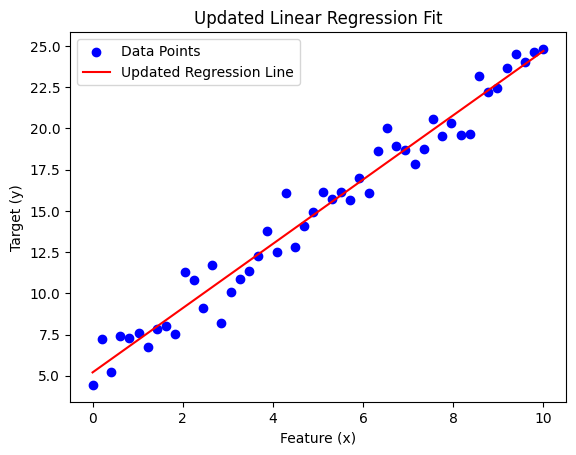

In [111]:
# Predictions
y_pred = theta_0 + theta_1 * x

# Plot the regression line
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Updated Regression Line')
plt.title('Updated Linear Regression Fit')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


### 📏 Model Evaluation Metrics

- **Cost Function (MSE):** Measures average squared error.
- **R-Squared (\(R^2\)):** Proportion of variance explained by the model.

$$
R^2 = 1 - \frac{\text{SS}_{\text{residual}}}{\text{SS}_{\text{total}}}
$$


In [112]:
r2 = r_squared(y, y_pred)
print(f"R-Squared Value: {r2:.4f}")


R-Squared Value: 0.9675


### 🤖 Make Predictions

Using the trained model, we can make predictions for new input values.

##### Prediction Formula:
$$
y = \theta_0 + \theta_1 x
$$

- $x$: New input feature value
- $y$: Predicted target value

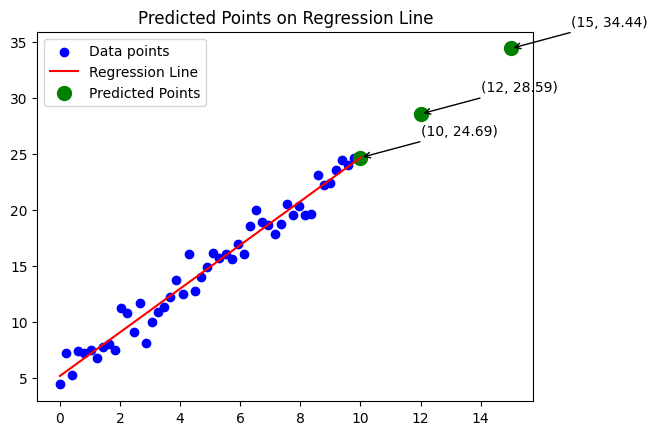

In [113]:
x_test = [10, 12, 15]
y_preds = [predict(xi, theta_0, theta_1) for xi in x_test]

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.scatter(x_test, y_preds, color='green', s=100, label='Predicted Points')

for xi, yi in zip(x_test, y_preds):
    plt.annotate(f'({xi}, {yi:.2f})', xy=(xi, yi), xytext=(xi + 2, yi + 2),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()
plt.title('Predicted Points on Regression Line')
plt.show()



### 📊 **Residuals vs Fitted Values Plot**

##### 🧠 **Key Observations:**
1. Residuals show a **downward pattern**, indicating systematic errors.
2. Positive residuals: The model underestimates actual values.
3. Negative residuals: The model overestimates actual values.

##### ✅ **Ideal Scenario:**
- Residuals should be **randomly distributed** around zero.
- A pattern suggests model bias or underfitting/overfitting.


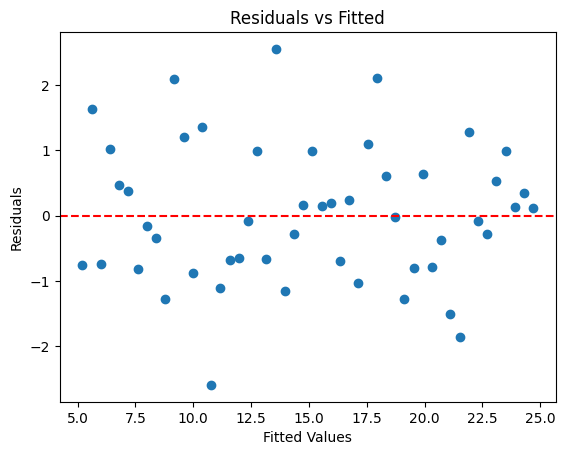

In [114]:
residuals = y - np.array(y_pred)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [115]:
# Initial Parameters for Training
theta_0_init = 0  # Reset initial theta_0
theta_1_init = 0  # Reset initial theta_1
learning_rate = 0.001
iterations = 2000
batch_size = 10

### ⚙️ **2. Batch Gradient Descent (BGD)**

- **Update Rule:** The model parameters are updated after **computing gradients using the entire dataset**.
- **Advantages:**
   - Smooth and stable convergence.
   - Guaranteed to reach a global minimum (for convex functions).
- **Disadvantages:**
   - Computationally expensive for large datasets.
   - Slow updates.

**Update Formula:**
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

**Use Case:** Small datasets.


In [116]:
# Train using Batch Gradient Descent
theta_0_b, theta_1_b, cost_b = batch_gradient_descent(x, y, theta_0_init, theta_1_init, learning_rate, iterations)
print(f"Batch GD -> Final Cost: {cost_b[-1]:.4f}, Theta_0: {theta_0_b:.4f}, Theta_1: {theta_1_b:.4f}")



--- Batch Gradient Descent ---
Batch GD -> Final Cost: 1.6500, Theta_0: 2.3134, Theta_1: 2.3814


### ⚡ **3. Stochastic Gradient Descent (SGD)**

- **Update Rule:** The model parameters are updated **after evaluating each individual sample**.
- **Advantages:**
   - Faster updates.
   - Suitable for large datasets.
- **Disadvantages:**
   - Noisy convergence path.
   - May never converge exactly to the global minimum.

**Update Formula:**
$$
\theta_j := \theta_j - \alpha \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

**Use Case:** Very large datasets or online learning.


In [117]:
# Train using Stochastic Gradient Descent
theta_0_s, theta_1_s, cost_s = stochastic_gradient_descent(x, y, theta_0_init, theta_1_init, learning_rate, batch_size)
print(f"SGD -> Final Cost: {cost_s[-1]:.4f}, Theta_0: {theta_0_s:.4f}, Theta_1: {theta_1_s:.4f}")


--- Stochastic Gradient Descent ---
SGD -> Final Cost: 2.9669, Theta_0: 1.0146, Theta_1: 2.4856


### 📦 **4. Mini-Batch Gradient Descent**

- **Update Rule:** The model parameters are updated after **processing a small batch of samples**.
- **Advantages:**
   - Faster convergence compared to Batch GD.
   - Less noisy updates compared to SGD.
- **Disadvantages:**
   - Requires tuning the mini-batch size.
   - Slightly more computational overhead than SGD.

**Update Formula:**
$$
\theta_j := \theta_j - \alpha \frac{1}{k} \sum_{i=1}^{k} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

**Use Case:** Medium to large datasets.


In [118]:
# Train using Mini-Batch Gradient Descent
theta_0_m, theta_1_m, cost_m = mini_batch_gradient_descent(x, y, theta_0_init, theta_1_init, learning_rate, iterations, batch_size)
print(f"Mini-Batch GD -> Final Cost: {cost_m[-1]:.4f}, Theta_0: {theta_0_m:.4f}, Theta_1: {theta_1_m:.4f}")


--- Mini-Batch Gradient Descent ---
Mini-Batch GD -> Final Cost: 0.5705, Theta_0: 4.8457, Theta_1: 2.0024


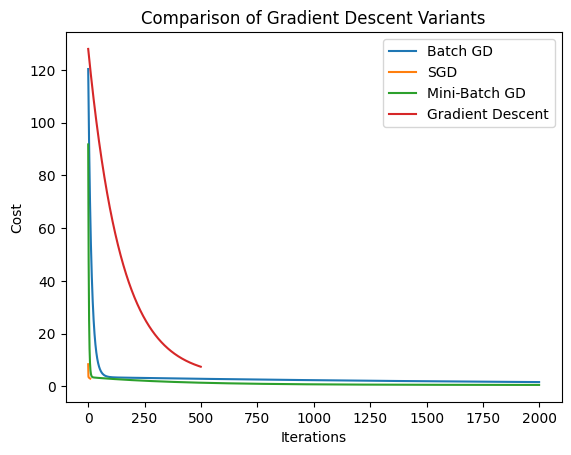

In [119]:
plt.plot(cost_b, label='Batch GD')
plt.plot(cost_s, label='SGD')
plt.plot(cost_m, label='Mini-Batch GD')
plt.plot(cost_history, label='Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Comparison of Gradient Descent Variants')
plt.legend()
plt.show()


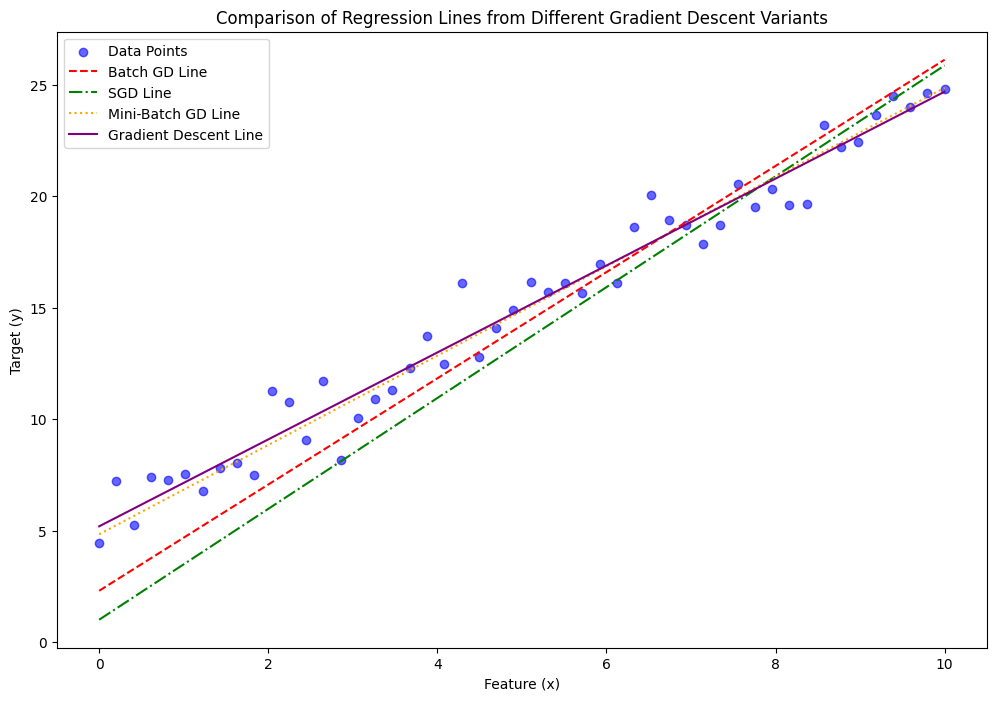

In [120]:
x_range = np.linspace(min(x), max(x), 100)  # Generate smooth x range for plotting

y_pred_b = theta_0_b + theta_1_b * x_range  # Batch GD Prediction
y_pred_s = theta_0_s + theta_1_s * x_range  # SGD Prediction
y_pred_m = theta_0_m + theta_1_m * x_range  # Mini-Batch GD Prediction
y_pred = theta_0 + theta_1 * x_range        # Standard GD Prediction

# Plot the original data points
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', label='Data Points', alpha=0.6)

# Plot regression lines for each gradient descent variant
plt.plot(x_range, y_pred_b, color='red', linestyle='--', label='Batch GD Line')
plt.plot(x_range, y_pred_s, color='green', linestyle='-.', label='SGD Line')
plt.plot(x_range, y_pred_m, color='orange', linestyle=':', label='Mini-Batch GD Line')
plt.plot(x_range, y_pred, color='purple', label='Gradient Descent Line')

plt.title('Comparison of Regression Lines from Different Gradient Descent Variants')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


In [121]:
print(f"SSE (Batch GD): {calculate_sse(y, theta_0_b + theta_1_b * x):.2f}")
print(f"SSE (SGD): {calculate_sse(y, theta_0_s + theta_1_s * x):.2f}")
print(f"SSE (Mini-Batch GD): {calculate_sse(y, theta_0_m + theta_1_m * x):.2f}")
print(f"SSE (Standard GD): {calculate_sse(y, theta_0 + theta_1 * x):.2f}")

SSE (Batch GD): 165.00
SSE (SGD): 296.69
SSE (Mini-Batch GD): 57.05
SSE (Standard GD): 55.12


In [122]:
print(f"R^2 (Batch GD): {r_squared(y, theta_0_b + theta_1_b * x):.4f}")
print(f"R^2  (SGD): {r_squared(y, theta_0_s + theta_1_s * x):.4f}")
print(f"R^2  (Mini-Batch GD): {r_squared(y, theta_0_m + theta_1_m * x):.4f}")
print(f"R^2  (Standard GD): {r_squared(y, theta_0 + theta_1 * x):.4f}")

R^2 (Batch GD): 0.9026
R^2  (SGD): 0.8249
R^2  (Mini-Batch GD): 0.9663
R^2  (Standard GD): 0.9675


In [123]:
X = np.c_[np.ones(x.shape[0]), x]  # Add intercept term as the first column
y = y.reshape(-1, 1)  # Ensure y is a column vector

print("Feature Matrix (X):")
print(X[:5])  # Display the first 5 rows
print("\nTarget Vector (y):")
print(y[:5])  # Display the first 5 rows


Feature Matrix (X):
[[1.         0.        ]
 [1.         0.20408163]
 [1.         0.40816327]
 [1.         0.6122449 ]
 [1.         0.81632653]]

Target Vector (y):
[[4.44394007]
 [7.23628949]
 [5.25510475]
 [7.41182478]
 [7.26121747]]


### 📊 **Normal Equation**

- The **Normal Equation** provides an **analytical (closed-form) solution** to the **Linear Regression problem**.
- It calculates the **optimal values of model parameters (θ)** directly, without requiring iterative optimization techniques like **Gradient Descent**.


The optimal parameter vector $\theta$ can be computed using the formula:

$$
\theta = (X^T X)^{-1} X^T y
$$

Where:
- $X$: Feature matrix (including the bias term column,( $x_0 = 1 $) )
- $X^T$: Transpose of the feature matrix  
- $y$: Target vector  
- $(X^T X)^{-1}$: Inverse of the matrix product $ X^T X $

---

##### 🛠️ **Derivation of the Normal Equation**

1. Start from the **Cost Function** in matrix form:
$$
J(\theta) = \frac{1}{2m} \left\| X\theta - y \right\|^2
$$

2. Take the **gradient** with respect to \( \theta \):
$$
\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^T (X \theta - y)
$$

3. Set the **gradient to zero** for minimization:
$$
X^T (X \theta - y) = 0
$$

4. Rearrange to isolate \( \theta \):
$$
\theta = (X^T X)^{-1} X^T y
$$

---

##### ✅ **Advantages of the Normal Equation**

1. **No Learning Rate Required:** Unlike Gradient Descent, no need to tune the learning rate ($ \alpha$).
2. **Direct Solution:** Provides an **exact solution** in a single computation.
3. **No Iterations Needed:** No iterative updates, saving computation time for smaller datasets.

---

### ❌ **Disadvantages of the Normal Equation**

1. **Computational Cost:** The matrix inversion ($(X^T X)^{-1} $) has a time complexity of $O(n^3)$, making it inefficient for very large datasets.
2. **Non-Invertibility:** If $ X^T X $ is not invertible (e.g., due to multicollinearity or too many features), the normal equation will fail.

In [124]:
theta = normal_equation(X, y)
print(f"\nOptimal Parameters (Theta): {theta.flatten()}")



Step 1: X^T X Computed
[[  50.          250.        ]
 [ 250.         1683.67346939]]

Step 2: X^T y Computed
[[ 747.81733014]
 [4582.32911521]]

Step 3: (X^T X)^-1 Computed
[[ 0.07764706 -0.01152941]
 [-0.01152941  0.00230588]]

Step 4: Optimal Theta Computed
[[5.23425701]
 [1.94441792]]

Optimal Parameters (Theta): [5.23425701 1.94441792]


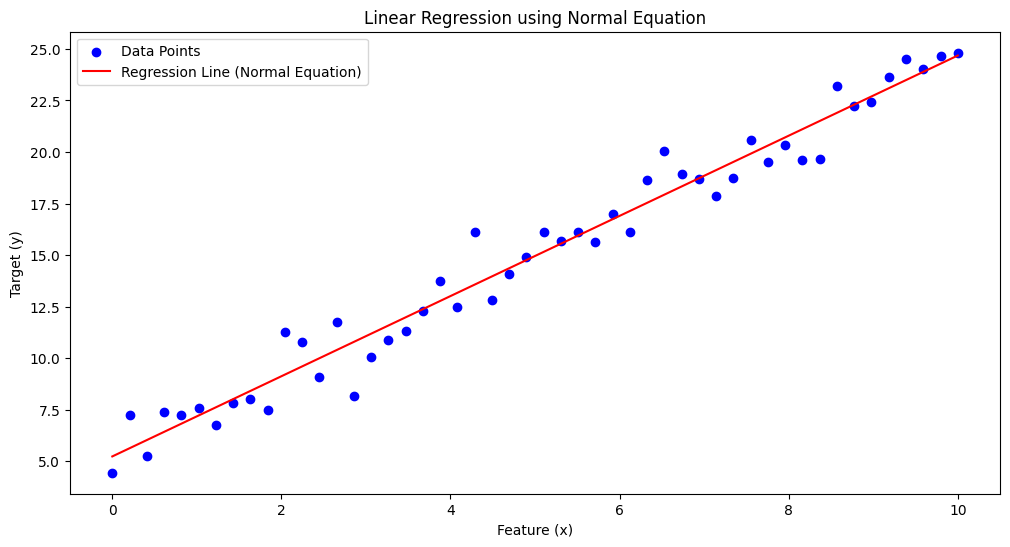

In [125]:
# Plot the regression line obtained from Normal Equation
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, theta[0] + theta[1] * x, color='red', label='Regression Line (Normal Equation)')
plt.title('Linear Regression using Normal Equation')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


In [136]:
y_pred = theta[0] + theta[1] * x
r2 = r_squared(y, y_pred)
print(f"R-Squared Value: {r2:.4f}")
sse = calculate_sse(y, y_pred)
print(f"Sum of Squared Errors (SSE): {sse:.2f}")

R-Squared Value: 0.9675
Sum of Squared Errors (SSE): 55.11


## 📈 **Regularized Normal Equation**

To prevent non-invertibility, a **regularization term** is added:

$$
\theta = (X^T X + \lambda I)^{-1} X^T y
$$

Where:
- $\lambda $: Regularization parameter (controls penalty on large coefficients).
- $ I $: Identity matrix (to prevent bias term regularization, set $ I_{0,0} = 0 $).

**Effect of Regularization (λ):**
- **Small λ:** Minimal penalty, closer to the original Normal Equation.
- **Large λ:** Higher penalty, coefficients shrink, reducing overfitting risk.


In [137]:
lambda_values = [0, 0.01, 1, 10, 100]

for lambda_param in lambda_values:
    theta = normal_equation_regularized(X, y, lambda_param)
    print(f"Theta for λ={lambda_param}: {theta.flatten()}")
    y_pred = theta[0] + theta[1] * x
    r2 = r_squared(y, y_pred)
    print(f"R-Squared Value for λ={lambda_param}: {r2:.4f}")
    sse = calculate_sse(y, y_pred)
    print(f"SSE for λ={lambda_param}: {sse:.2f}\n")

Theta for λ=0: [5.23425701 1.94441792]
R-Squared Value for λ=0: 0.9675
SSE for λ=0: 55.11

Theta for λ=0.01: [5.23448119 1.94437308]
R-Squared Value for λ=0.01: 0.9675
SSE for λ=0.01: 55.11

Theta for λ=1: [5.25662343 1.93994463]
R-Squared Value for λ=1: 0.9675
SSE for λ=1: 55.12

Theta for λ=10: [5.45338415 1.90059249]
R-Squared Value for λ=10: 0.9670
SSE for λ=10: 55.94

Theta for λ=100: [7.05598699 1.58007192]
R-Squared Value for λ=100: 0.9335
SSE for λ=100: 112.68



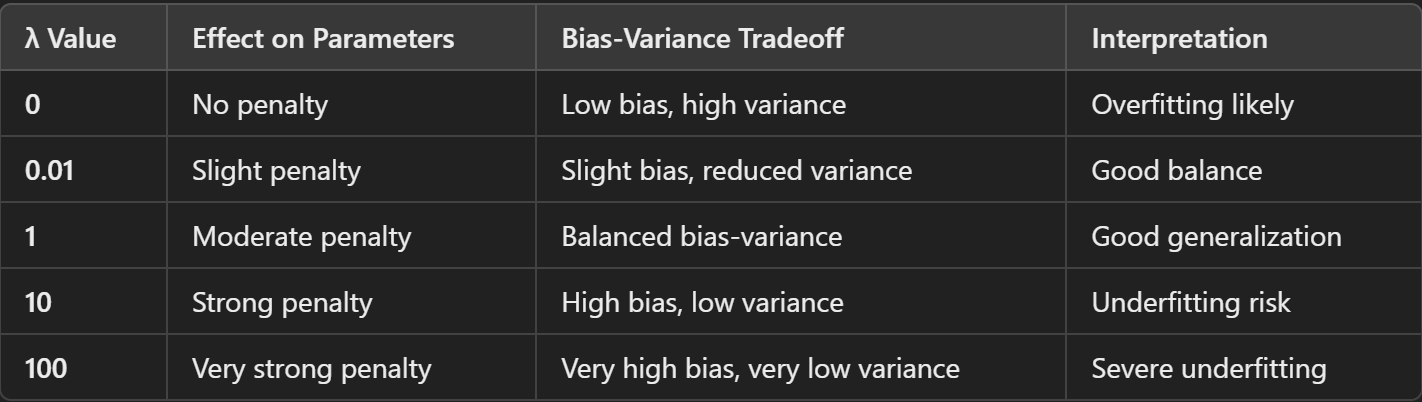

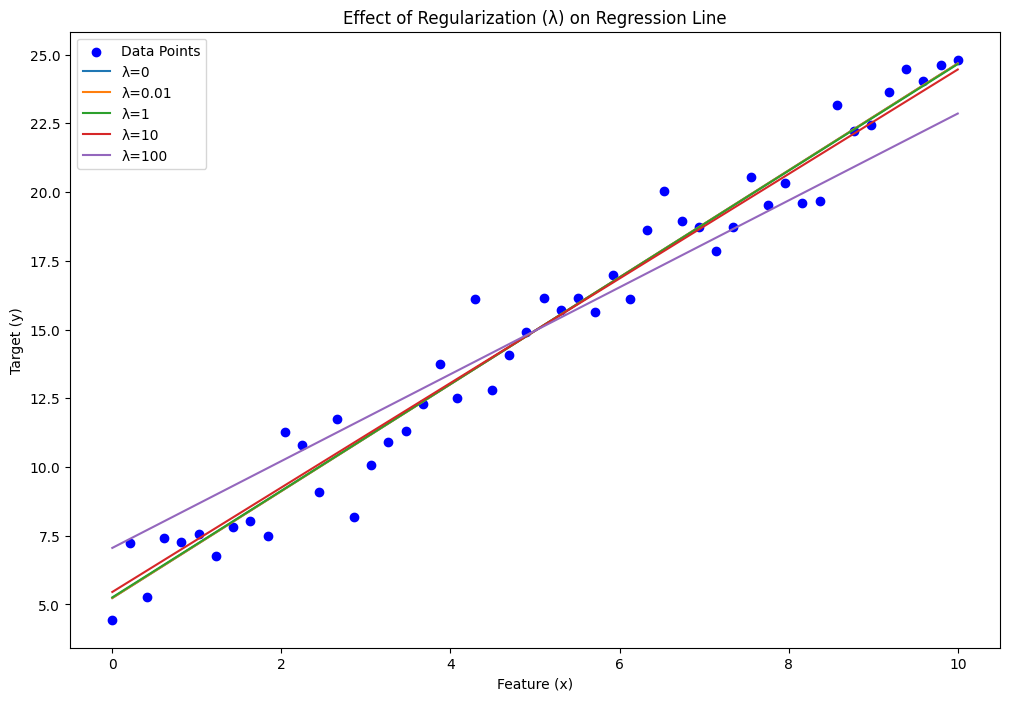

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', label='Data Points')

for lambda_param in [0, 0.01, 1, 10, 100]:
    theta = normal_equation_regularized(X, y, lambda_param)
    plt.plot(x, theta[0] + theta[1] * x, label=f'λ={lambda_param}')

plt.title('Effect of Regularization (λ) on Regression Line')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


### 📊 **Probabilistic Interpretation of Least Squares**

The **least squares method** in Linear Regression can be derived from a **probabilistic perspective** by assuming a model with **additive Gaussian noise**.

We assume a **linear model** with an additive error term:

$$
y^{(i)} = \theta^T x^{(i)} + \epsilon^{(i)}
$$

- $y^{(i)}$: Observed value for the $i^{th}$ sample  
- $\theta^T x^{(i)}$: Predicted value based on model parameters $\theta$ and features $x^{(i)}$  
- $\epsilon^{(i)}$: Error term capturing unmodeled effects and random noise  

---

##### 📉 **2. Distribution of the Error Term**

We assume the **error term follows a Gaussian (Normal) distribution**:

$$
\epsilon^{(i)} \sim \mathcal{N}(0, \sigma^2)
$$

- **Mean:** $0$ → The errors are centered around zero.  
- **Variance:** $\sigma^2$ → The noise has constant variance across all samples.  
- Errors are assumed to be:
   - **Independently Distributed (i.i.d.)**  
   - **Identically Distributed (same variance)**  

---

##### 📊 **3. Conditional Probability of $y^{(i)}$ Given $x^{(i)}$**

Using the assumption of Gaussian noise, the **conditional probability distribution** of $y^{(i)}$ given $x^{(i)}$ and parameters $\theta$ is:

$$
p(y^{(i)} | x^{(i)}; \theta) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 \sigma^2} \right)
$$

- Each observation is normally distributed around the **predicted value** $\theta^T x^{(i)}$ with variance $\sigma^2$.  
- The probability density is higher when the predicted value is closer to the observed value.

---

##### 📈 **4. Likelihood Function**

The **Likelihood Function**, denoted as $L(\theta)$, represents the probability of observing the dataset given the parameters:

$$
L(\theta) = P(\mathbf{y} | X; \theta) = \prod_{i=1}^m p(y^{(i)} | x^{(i)}; \theta)
$$

Expanding using the Gaussian assumption:

$$
L(\theta) = \prod_{i=1}^m \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 \sigma^2} \right)
$$

- The **likelihood function** measures how well the model parameters $\theta$ explain the observed data.

---

##### 📊 **5. Log-Likelihood Function**

To simplify calculations, we take the **natural logarithm** of the likelihood function:

$$
\ell(\theta) = \log L(\theta) = -\frac{m}{2} \log(2 \pi \sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^m (y^{(i)} - \theta^T x^{(i)})^2
$$

- The first term is constant w.r.t $\theta$.  
- The second term depends on the **sum of squared errors (SSE)**.  

Maximizing the **log-likelihood** is equivalent to minimizing the **Sum of Squared Errors (SSE)**.

---

##### 🏆 **6. Maximum Likelihood Estimation (MLE)**

To find the **best-fitting parameters ($\theta$)**, we maximize the log-likelihood function:

$$
\max_{\theta} \ell(\theta)
$$

This is equivalent to minimizing the **Sum of Squared Errors (SSE)**:

$$
\min_{\theta} \sum_{i=1}^m (y^{(i)} - \theta^T x^{(i)})^2
$$

- The optimization problem reduces to the standard **Least Squares Estimation (LSE)**.  
- This connection shows that minimizing the SSE corresponds to **maximizing the likelihood under Gaussian noise assumptions**.

Optimal Parameters (Theta): [5.23425701 1.94441792]


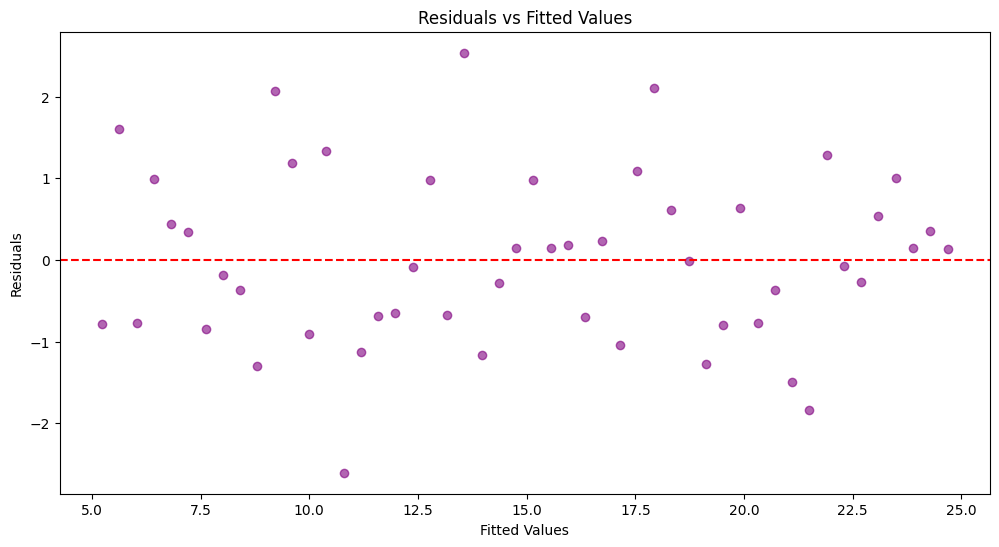

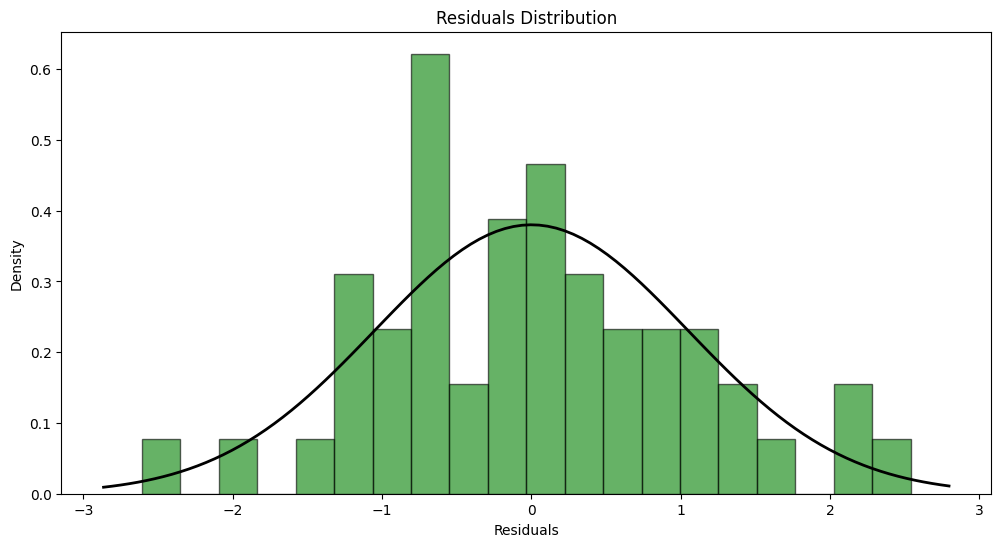

In [138]:
from scipy.stats import norm

# Add Bias Term (x0 = 1) to Feature Matrix
# X becomes a matrix with a bias column and feature x
X = np.c_[np.ones(x.shape[0]), x]  # Adds a column of 1s for the bias term

#  Fit Linear Regression using Normal Equation

# Formula: θ = (X^T X)^(-1) X^T y
# - X.T: Transpose of the feature matrix
# - np.linalg.inv(): Computes the inverse of (X^T X)
# - @: Matrix multiplication

# Normal Equation for Least Squares Estimation (LSE)
theta = np.linalg.inv(X.T @ X) @ X.T @ y  # Optimal parameter calculation using the Normal Equation

print(f"Optimal Parameters (Theta): {theta}")

# 📈 Make Predictions using the Model

# Predict y-values using the fitted parameters
# Formula: y_pred = X @ θ
y_pred = X @ theta

# Residuals Analysis

# Residuals: Difference between actual and predicted values
# Formula: residuals = y - y_pred
residuals = y - y_pred

# Plot Residuals vs Fitted Values
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal reference line at y=0
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


# 📊 Residuals Distribution

# Residuals should follow a normal distribution centered around 0
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=20, density=True, alpha=0.6, color='green', edgecolor='black') 

# Plot Gaussian PDF (Probability Density Function) for residuals
xmin, xmax = plt.xlim()  # Get plot x-axis limits
x_range = np.linspace(xmin, xmax, 100)  # Generate evenly spaced values for PDF plot
p = norm.pdf(x_range, residuals.mean(), residuals.std())  # Calculate Gaussian PDF
plt.plot(x_range, p, 'k', linewidth=2)  

plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()


Residual shows a distribution that will converge to a normal with a greater number of sample. The residual are spread across the scatterplot as cloud point, best case scenario since they don't have any pattern

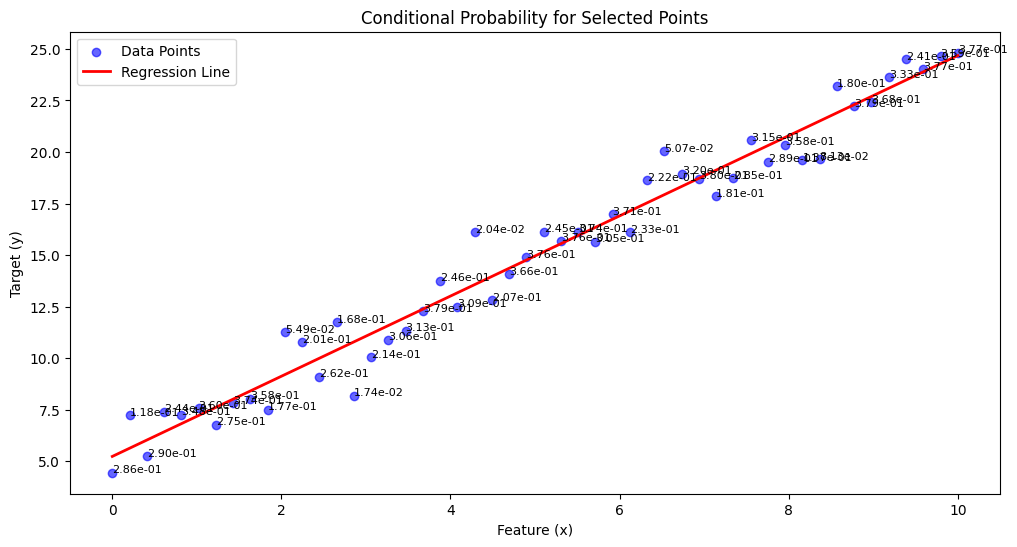

In [129]:
# Estimate Variance (σ²) from Residuals
sigma_squared = np.var(residuals)

y = y.flatten()
y_pred = y_pred.flatten()

plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(x, y_pred, color='red', linewidth=2, label='Regression Line')

# Highlight points with conditional probability
for i in range(50):
    prob = conditional_probability(y[i], y_pred[i], sigma_squared)
    plt.text(x[i], y[i], f'{prob:.2e}', fontsize=8, color='black')

plt.title('Conditional Probability for Selected Points')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


In [130]:
L = likelihood(y, y_pred, sigma_squared)
print(f"Likelihood (L): {L:.5e}")

Likelihood (L): 1.35433e-32


The results shows that:
- The dataset has high variance.
- The model's parameters might not fit the data perfectly.
- This is normal for datasets with noise and larger sample sizes because multiplying many small probabilities results in an extremely small final product.

Solution: Using **Log-Likelihood**

In [131]:
log_L = log_likelihood(y, y_pred, sigma_squared)
print(f"Log-Likelihood (ℓ): {log_L:.2f}")


Log-Likelihood (ℓ): -73.38


The log-likelihood value of -70.97 means that the model parameters yield a probability distribution that aligns reasonably well with the observed data, but there's still room for improvement.

- The value is negative because the logarithm of a probability (values between 0 and 1) is always negative.
- Closer to 0 (less negative): Indicates a better fit.
- More negative: Suggests a worse fit or higher residual variance.


### 📊 **Relationship Between Variables in Regression Analysis**

Understanding the **relationship between variables** is a fundamental aspect of regression analysis. It helps determine how changes in one variable correspond to changes in another and assesses the quality of a regression model.


##### 🧠 **1. Correlation**

When two variables exhibit a pattern such that they track each other's changes closely, it suggests a **strong correlation** between them. In regression:
- Strong correlation often leads to a **better model fit**.
- Weak or no correlation suggests a **poor fit** or no linear relationship.

---

##### 🛠️ **2. Method of Least Squares**

The **Method of Least Squares** minimizes the **Sum of Squared Errors (SSE)** to find the **best-fit line** for the data points.

$$
\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- $ y_i $: Actual value of the $ i^{th} $ sample.  
- $ \hat{y}_i $: Predicted value of the $i^{th} $ sample.  
- SSE measures the **vertical distance** between each data point and the regression line.

1. A **lower SSE** indicates a **better-fitting regression line**.
2. A **higher SSE** suggests poor model performance.

---

##### 📈 **3. Pearson's Product-Moment Correlation (PPMC)**

The **Pearson correlation coefficient (r)** measures the **strength and direction of a linear relationship** between two variables.

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

- $ x_i, y_i $: Individual sample values.  
- $ \bar{x}, \bar{y} $: Mean of $x$ and $y$.  
- $ r $ ranges between **-1** and **+1**.

- **$ r = +1 $:** Perfect positive correlation (variables move in the same direction).  
- **$ r = 0 $:** No correlation (no linear relationship).  
- **$ r = -1 $:** Perfect negative correlation (variables move in opposite directions).  

- Symmetric: Swapping $x$ and $y$ does not affect $r$.  
- Sensitive to outliers: A single outlier can significantly affect $r$.  

---

##### 🏆 **4. Coefficient of Determination (\( R^2 \))**

The **coefficient of determination (\( R^2 \))** measures how well the regression model explains the **variability in the target variable**.

$$
R^2 = \frac{\text{Explained Variance}}{\text{Total Variance}}
$$

For **simple linear regression**, \( R^2 \) simplifies to:
$$
R^2 = r^2
$$

1. **Range:** $ 0 \leq R^2 \leq 1 $
2. **Closer to 1:** The model explains most of the variance in the target variable.  
3. **Closer to 0:** The model fails to explain the variability in the target variable.  



In [132]:
sse = calculate_sse(y, y_pred)
print(f"Sum of Squared Errors (SSE): {sse:.2f}")

Sum of Squared Errors (SSE): 55.11


In [133]:
r = calculate_ppmc(x, y)
print(f"Pearson Correlation Coefficient (r): {r:.2f}")

Pearson Correlation Coefficient (r): 0.98


In [134]:
r2 = r_squared(y, y_pred)
print(f"Coefficient of Determination (R²): {r2:.2f}")


Coefficient of Determination (R²): 0.97


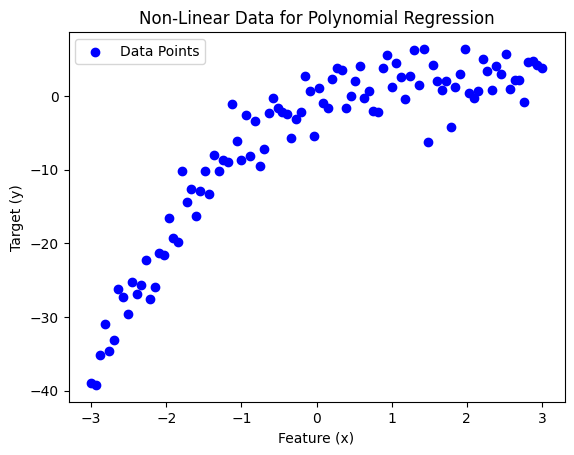

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic non-linear data
np.random.seed(42)
x = np.linspace(-3, 3, 100)
y = 0.5 * x**3 - 2 * x**2 + 3 * x + np.random.randn(100) * 3

plt.scatter(x, y, color='blue', label='Data Points')
plt.title('Non-Linear Data for Polynomial Regression')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


In [143]:
degree = 3
X_poly = polynomial_features(x, degree)
print("Shape of Polynomial Feature Matrix:", X_poly.shape)


Shape of Polynomial Feature Matrix: (100, 4)


In [144]:
theta_poly = fit_polynomial_regression(X_poly, y)
print("Polynomial Regression Coefficients:", theta_poly)


Polynomial Regression Coefficients: [-0.49849751  3.84964337 -1.93891473  0.35827405]


### 📚 **Polynomial Regression**

Polynomial Regression is an extension of **Linear Regression** where the relationship between the **independent variable (x)** and the **dependent variable (y)** is modeled as an $n$-degree polynomial.

The hypothesis function for polynomial regression is:

$$
h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \dots + \theta_d x^d
$$

- **$ x $:** Input feature  
- **$ \theta $:** Model coefficients  
- **$ d $:** Degree of the polynomial  

The model becomes more flexible as the degree $ d $ increases, allowing it to capture more complex relationships.

- **Overfitting:** A high-degree polynomial fits the noise in the data rather than the underlying pattern, resulting in poor generalization on unseen data.
- **Underfitting:** A low-degree polynomial fails to capture the underlying trends in the data, resulting in high bias.



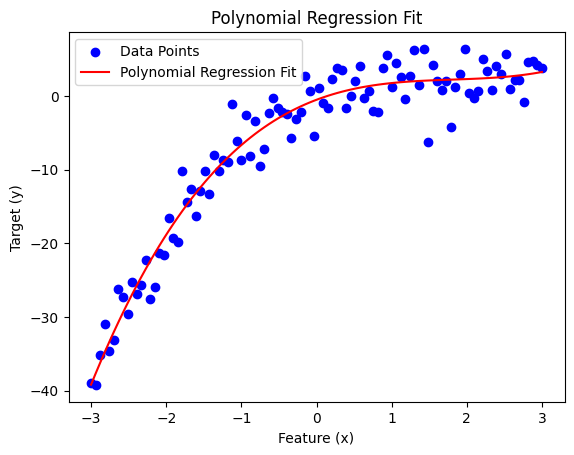

In [ ]:
y_pred_poly = predict_polynomial(X_poly, theta_poly)

# Plot
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_poly, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression Fit')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


In [146]:
def gaussian_kernel(x, x_query, tau):
    """
    Calculate Gaussian weights for LWR.
    """
    distances = (x - x_query)**2
    weights = np.exp(-distances / (2 * tau**2))
    return np.diag(weights)


In [147]:
def locally_weighted_regression(x, y, x_query, tau):
    """
    Perform Locally Weighted Regression for a single query point.
    """
    X = np.c_[np.ones_like(x), x]  # Add bias term
    X_query = np.array([1, x_query])  # Add bias term for query point

    W = gaussian_kernel(x, x_query, tau)  # Get weights

    # Solve for theta using weighted normal equation
    theta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ y
    y_pred = X_query @ theta
    return y_pred


### 📊 **Regularization in Polynomial Regression**

Regularization helps prevent **overfitting** by adding a penalty term to the cost function.

##### 🛠️ **L2 Regularization (Ridge Regression)**

The cost function becomes:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^n \theta_j^2
$$

- **$ \lambda $:** Controls the strength of regularization.  
- Shrinks large coefficients, reducing model complexity.

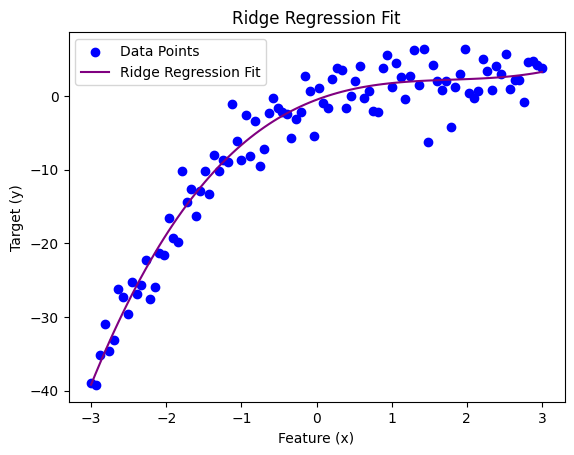

In [149]:
lambda_ridge = 0.1
theta_ridge = ridge_regression(X_poly, y, lambda_ridge)
y_pred_ridge = predict_polynomial(X_poly, theta_ridge)

plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_ridge, color='purple', label='Ridge Regression Fit')
plt.title('Ridge Regression Fit')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


##### 🛠️ **L1 Regularization (Lasso Regression)**

The cost function becomes:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2 + \lambda \sum_{j=1}^n |\theta_j|
$$

- Encourages **sparsity** by reducing some coefficients to zero.  
- Useful for **feature selection**.

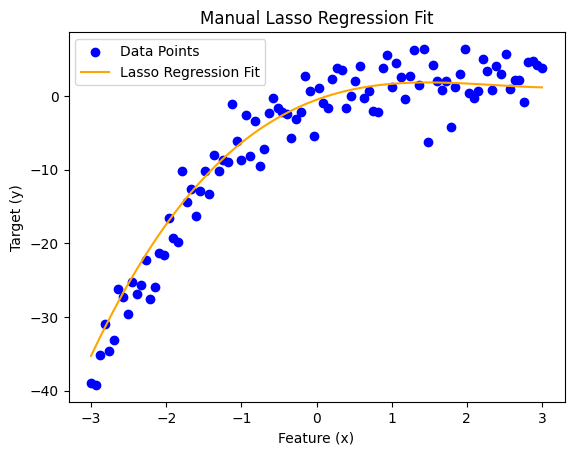

Lasso Regression Coefficients (Theta): [-0.49928953  0.          3.74190443 -1.83865595  0.25945111]


In [ ]:
lambda_lasso = 0.1
theta_lasso = lasso_regression(X_poly, y, lambda_lasso)

y_pred_lasso = predict_polynomial_lasso(X_poly, theta_lasso)

# Plot
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_lasso, color='orange', label='Lasso Regression Fit')
plt.title('Manual Lasso Regression Fit')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

print("Lasso Regression Coefficients (Theta):", theta_lasso)


### 📊 **2. Locally Weighted Regression (LWR)**

Locally Weighted Regression (LWR) is a **non-parametric regression technique** that builds local models around each query point.

1. **Local Model:** Builds a regression model for each query point $ x_q $.  
2. **Weighted Contribution:** Nearby data points contribute more to the prediction.  
3. **No Global Hypothesis:** Each prediction has its own regression model.

---

##### 🧠 **2.1 Gaussian Kernel for Weighting**

The weight of each data point is determined using a **Gaussian Kernel**:

$$
w^{(i)} = \exp\left(-\frac{d^2}{2\tau^2}\right)
$$

- **$ d $:** Distance between $ x^{(i)} $ and the query point $ x_q $.  
- **$ \tau $:** Bandwidth parameter controls the influence of nearby points.  

---

##### 🛠️ **2.2 Cost Function in LWR**

The cost function emphasizes local data points:

$$
J(\theta) = \sum_{i=1}^{m} w^{(i)} \left( y^{(i)} - \theta^T x^{(i)} \right)^2
$$

- **$ w^{(i)} $:** Weight of each data point based on distance.  
- Minimizing this cost produces the optimal parameters for each query point.

---

##### ✅ **2.3 Optimal Parameters in LWR**

The optimal parameters $ \theta $ are obtained using the **Normal Equation** with weights:

$$
\theta = (X^T W X)^{-1} X^T W Y
$$

- **$ W $:** Diagonal matrix with weights.  
- **$ X $:** Feature matrix.  
- **$ Y $:** Target vector.

---

✅ **Advantages:**
- **Flexibility:** Adapts to local patterns in the data.  
- **No Global Assumptions:** Reduces bias from a single hypothesis function.

❌ **Challenges:**
- **Computational Complexity:** Expensive for large datasets ($ O(m^2) $).  
- **Memory Intensive:** Requires storing the entire dataset for each prediction.



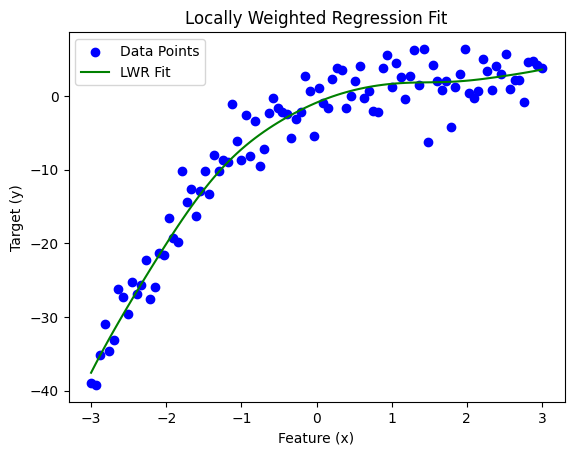

In [154]:
# Perform LWR for multiple query points
tau = 0.5  # Bandwidth parameter
x_queries = np.linspace(min(x), max(x), 100)
y_preds_lwr = [locally_weighted_regression(x, y, x_query, tau) for x_query in x_queries]

# Plot LWR results
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_queries, y_preds_lwr, color='green', label='LWR Fit')
plt.title('Locally Weighted Regression Fit')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()


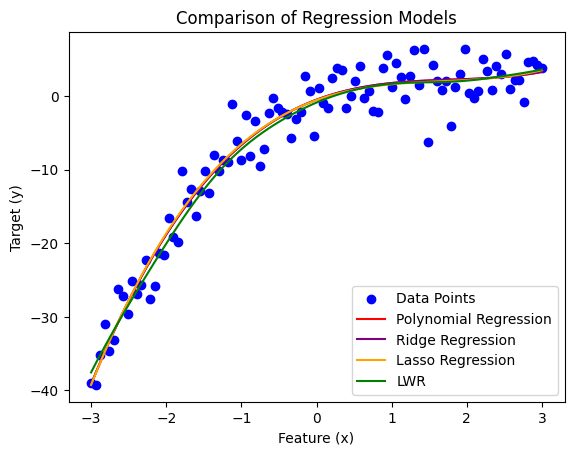

SSE (Polynomial): 695.118779358421
SSE (Ridge Regression): 695.1217373827765
SSE (Lasso Regression): 696.7008340459604
SSE (LWR): 703.8979915261315
R² (Polynomial): 0.950758689152433
R² (Ridge Regression): 0.9507584796098324
R² (Lasso Regression): 0.9506466184546468
R² (LWR): 0.950136781173273


In [155]:
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_poly, color='red', label='Polynomial Regression')
plt.plot(x, y_pred_ridge, color='purple', label='Ridge Regression')
plt.plot(x, y_pred_lasso, color='orange', label='Lasso Regression')
plt.plot(x_queries, y_preds_lwr, color='green', label='LWR')

plt.title('Comparison of Regression Models')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

print("SSE (Polynomial):", calculate_sse(y, y_pred_poly))
print("SSE (Ridge Regression):", calculate_sse(y, y_pred_ridge))
print("SSE (Lasso Regression):", calculate_sse(y, y_pred_lasso))
print("SSE (LWR):", calculate_sse(y, y_preds_lwr))
print("R² (Polynomial):", r_squared(y, y_pred_poly))
print("R² (Ridge Regression):", r_squared(y, y_pred_ridge))
print("R² (Lasso Regression):", r_squared(y, y_pred_lasso))
print("R² (LWR):", r_squared(y, y_preds_lwr))
